# Dataset plots

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

okabe_ito_colors = [
    "#000000",  # Black
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermilion
    "#CC79A7",  # Reddish Purple
]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=okabe_ito_colors)

def plot_mean_with_std(csv_path, x_column, y_column, ax=None, label=None):
    # Read CSV
    df = pd.read_csv(csv_path)

    # Parse y_column entries as lists of floats
    df[y_column] = df[y_column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Compute mean and std for each row's list
    means = df[y_column].apply(np.mean)
    stds = df[y_column].apply(np.std)
    
    # Get time values from x_column
    x = df[x_column]

    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(x, means, label=label, color=color)
    plt.fill_between(x, means - stds, means + stds, color=color, alpha=0.3)
    return ax


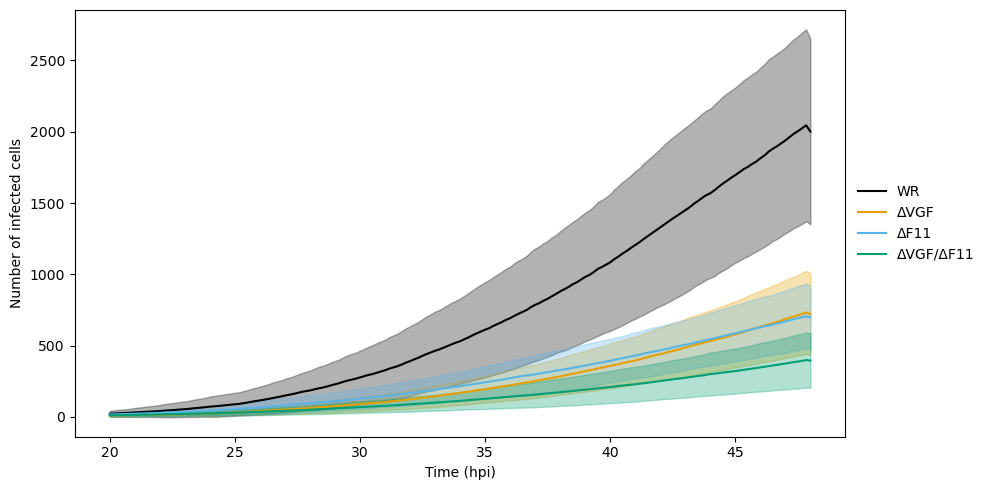

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel("Number of infected cells")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-infcount.svg", format="svg", bbox_inches="tight")
plt.show()


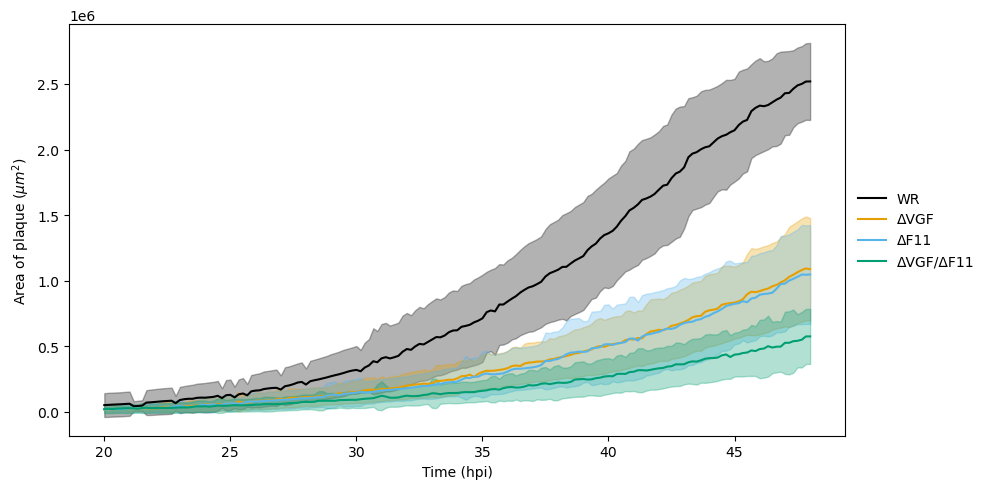

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel(r"Area of plaque ($\mu m^2$)")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-area.svg", format="svg", bbox_inches="tight")
plt.show()


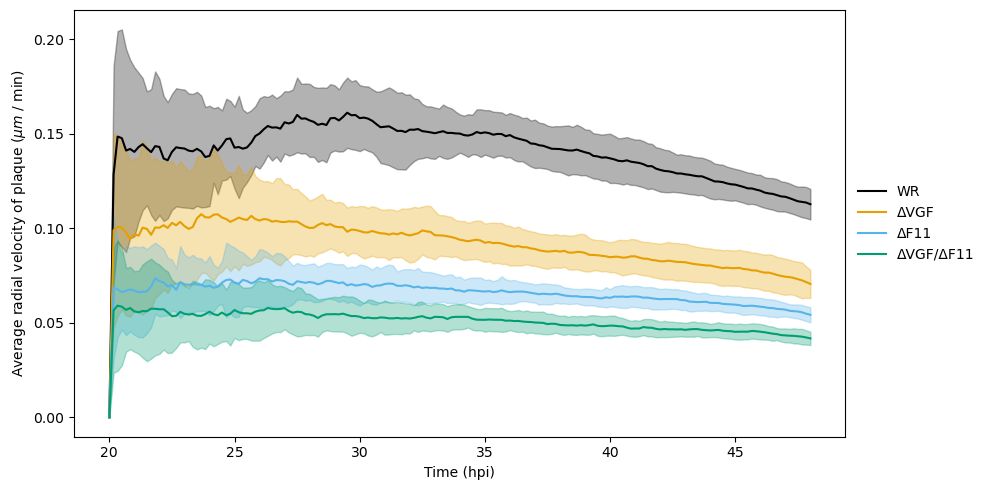

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel(r"Average radial velocity of plaque ($\mu m$ / min)")
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=4)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-radial-velocity-right-legend.svg", format="svg", bbox_inches="tight")
plt.show()


# Sim vs Obs (pop vs. pop)

Generating plot for: Number of infected cells


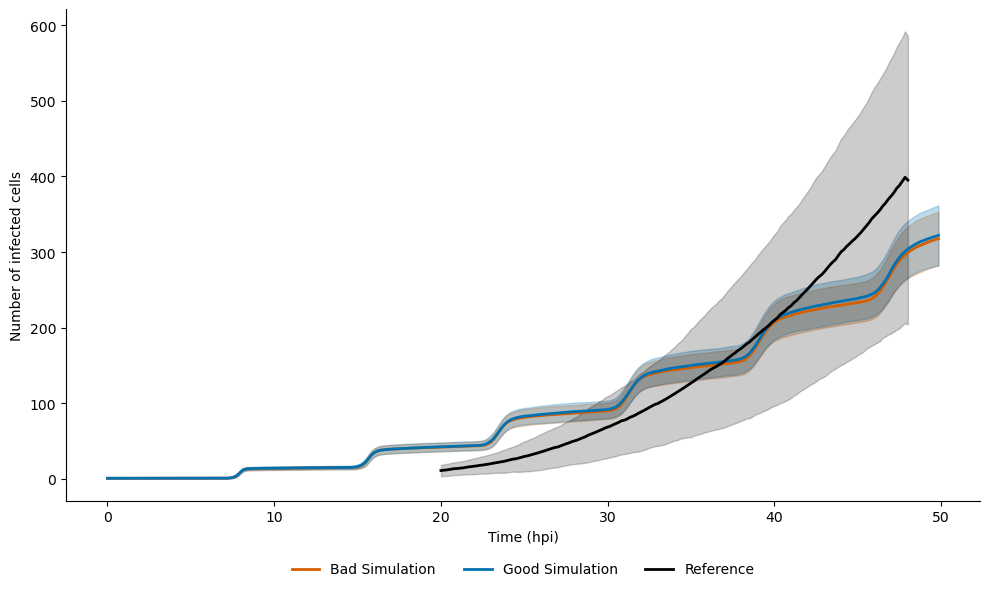

Generating plot for: Area of plaque ($\mu m^2$)


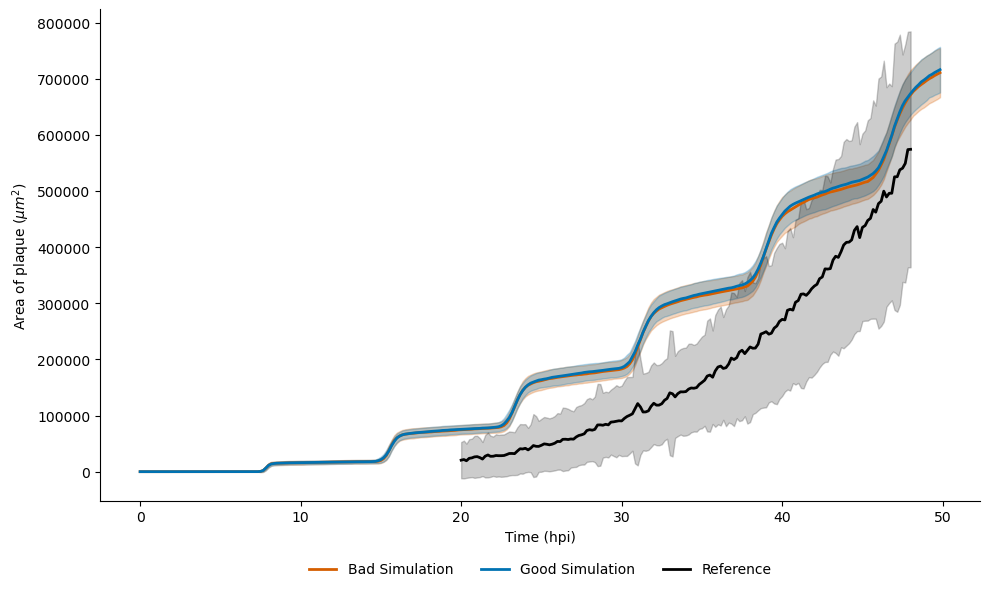

Generating plot for: Average radial velocity of plaque ($\mu m$/min)


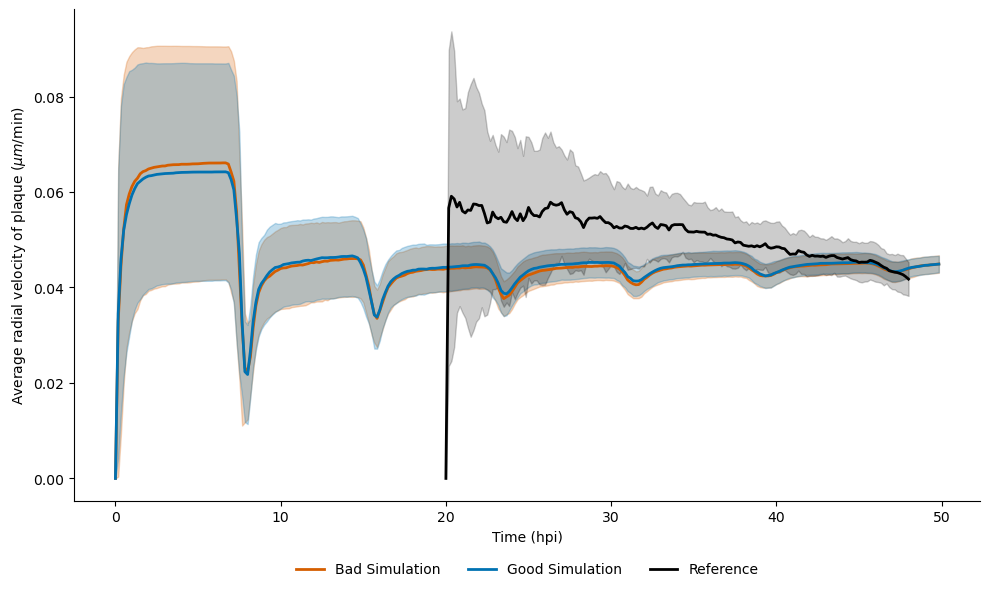


All plots have been generated and saved.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
import glob

# --- User Configuration ---
# PLEASE UPDATE THESE PATHS TO YOUR FOLDERS AND FILE
BAD_SIM_ROOT_DIR = "/Users/ashkanhzdr/workspace/infectio-mesa/output/top10_mae_minmaxnormalized/randomwalk_speed=0.4-c2c_sigmoid_k=0.25-c2c_sigmoid_t0=6-c2c_sigmoid_tmid=64-c2c_radius_search=20-first_cell_lag=36"  # Parent folder for "bad" simulation runs
GOOD_SIM_ROOT_DIR = "/Users/ashkanhzdr/workspace/infectio-mesa/output/top10_mae_minmaxnormalized/randomwalk_speed=0.6-c2c_sigmoid_k=0.05-c2c_sigmoid_t0=12-c2c_sigmoid_tmid=48-c2c_radius_search=25-first_cell_lag=36" # Parent folder for "good" simulation runs
REFERENCE_CSV_PATH = "/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv" # Path to the experimental data CSV

# --- Plotting Configuration ---
# Define the specific colors for the plots
PLOT_COLORS = {
    "reference": "#000000", # Black
    "good": "#0072B2",      # Blue
    "bad": "#D55E00"        # Vermilion/Red
}

# --- Helper Function for Reference (Experimental) Data ---
# This function is adapted from your original code to handle CSVs
# where a column contains a list of values as a string.

def plot_reference_data(csv_path, x_column, y_column, ax, label):
    """
    Plots mean and standard deviation from a reference CSV file.
    The y_column is expected to contain strings representing lists of numbers.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"Error: The reference file was not found at '{csv_path}'. Please check the path.")
        return ax

    # Parse y_column entries from string '[v1, v2, ...]' to actual lists
    df[y_column] = df[y_column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Compute mean and std for each row's list
    means = df[y_column].apply(np.mean)
    stds = df[y_column].apply(np.std)
    x = df[x_column]

    # Plot
    color = PLOT_COLORS['reference']
    ax.plot(x, means, label=label, color=color, linewidth=2)
    ax.fill_between(x, means - stds, means + stds, color=color, alpha=0.2)
    return ax

# --- Helper Function for Simulation Data ---
# This function finds all 'metric.csv' files in subdirectories of a root folder,
# aggregates the data, and plots the mean and standard deviation.

def plot_simulation_data(root_dir, x_column, y_column, ax, label, color_key):
    """
    Aggregates data from multiple simulation runs and plots the mean and std.
    """
    # Find all 'metric.csv' files in the immediate subdirectories
    search_pattern = os.path.join(root_dir, '*', 'metric.csv')
    run_files = glob.glob(search_pattern)

    if not run_files:
        print(f"Warning: No 'metric.csv' files found in subdirectories of '{root_dir}'. Skipping plot.")
        return ax

    # Load all dataframes into a list
    all_dfs = [pd.read_csv(f) for f in run_files]

    # Combine all dataframes into one
    combined_df = pd.concat(all_dfs)

    # Group by the time step and calculate mean and std for the metric
    grouped = combined_df.groupby(x_column)[y_column]
    means = grouped.mean()
    stds = grouped.std()
    x = means.index

    # Plot
    color = PLOT_COLORS[color_key]
    ax.plot(x, means, label=label, color=color, linewidth=2)
    ax.fill_between(x, means - stds, means + stds, color=color, alpha=0.25)
    return ax


# --- Main Plotting Logic ---

# Define the metrics to plot.
# Each dictionary specifies the column names in the simulation and reference files,
# and the desired label for the y-axis.
metrics_to_plot = [
    {
        "sim_col": "infected-count",
        "ref_col": "inf-count-list",
        "ylabel": "Number of infected cells",
        "filename": "comparison_infected_count.svg"
    },
    {
        "sim_col": "area(um2)",
        "ref_col": "area-list(um2)",
        "ylabel": r"Area of plaque ($\mu m^2$)",
        "filename": "comparison_area.svg"
    },
    {
        "sim_col": "radial-velocity(um/min)",
        "ref_col": "radial-velocity-list(um/min)",
        "ylabel": r"Average radial velocity of plaque ($\mu m$/min)",
        "filename": "comparison_radial_velocity.svg"
    }
]

# Generate a plot for each metric
for metric in metrics_to_plot:
    print(f"Generating plot for: {metric['ylabel']}")
    fig, ax = plt.subplots(figsize=(10, 6))

    # 1. Plot the "Bad" simulation data (in red)
    plot_simulation_data(
        root_dir=BAD_SIM_ROOT_DIR,
        x_column='t',
        y_column=metric['sim_col'],
        ax=ax,
        label='Bad Simulation',
        color_key='bad'
    )

    # 2. Plot the "Good" simulation data (in blue)
    plot_simulation_data(
        root_dir=GOOD_SIM_ROOT_DIR,
        x_column='t',
        y_column=metric['sim_col'],
        ax=ax,
        label='Good Simulation',
        color_key='good'
    )
    
    # 3. Plot the Reference experimental data (in black)
    plot_reference_data(
        csv_path=REFERENCE_CSV_PATH,
        x_column='t',
        y_column=metric['ref_col'],
        ax=ax,
        label='Reference'
    )

    # --- Style the plot ---
    ax.set_xlabel("Time (hpi)")
    ax.set_ylabel(metric['ylabel'])
    # ax.set_title(f"Comparison of Model Performance for {metric['ylabel']}")
    # ax.legend(loc='upper left', frameon=False)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=4)
    ax.grid(False) # Turn off grid lines
    
    # Remove top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(metric['filename'], format="svg", bbox_inches="tight")
    plt.show()

print("\nAll plots have been generated and saved.")